# Is EDM really for Dancing?
### EDM danceability ratings don't live up to the name

In [1]:
library('tidyverse')
library('ggrepel')
library('patchwork')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
songs <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  track_id = col_character(),
  track_name = col_character(),
  track_artist = col_character(),
  track_album_id = col_character(),
  track_album_name = col_character(),
  track_album_release_date = col_character(),
  playlist_name = col_character(),
  playlist_id = col_character(),
  playlist_genre = col_character(),
  playlist_subgenre = col_character()
)

See spec(...) for full column specifications.



In [3]:
songs %>% print

# A tibble: 32,833 x 23
   track_id track_name track_artist track_popularity track_album_id
   <chr>    <chr>      <chr>                   <dbl> <chr>         
 1 6f807x0… I Don't C… Ed Sheeran                 66 2oCs0DGTsRO98…
 2 0r7CVbZ… Memories … Maroon 5                   67 63rPSO264uRjW…
 3 1z1Hg7V… All the T… Zara Larsson               70 1HoSmj2eLcsrR…
 4 75Fpbth… Call You … The Chainsm…               60 1nqYsOef1yKKu…
 5 1e8PAfc… Someone Y… Lewis Capal…               69 7m7vv9wlQ4i0L…
 6 7fvUMiy… Beautiful… Ed Sheeran                 67 2yiy9cd2QktrN…
 7 2OAylPU… Never Rea… Katy Perry                 62 7INHYSeusaFly…
 8 6b1RNvA… Post Malo… Sam Feldt                  69 6703SRPsLkS4b…
 9 7bF6tCO… Tough Lov… Avicii                     68 7CvAfGvq4RlIw…
10 1IXGILk… If I Can'… Shawn Mendes               67 4QxzbfSsVryEQ…
# … with 32,823 more rows, and 18 more variables: track_album_name <chr>,
#   track_album_release_date <chr>, playlist_name <chr>, playlist_id <chr>,
#   playli

`summarise()` ungrouping output (override with `.groups` argument)



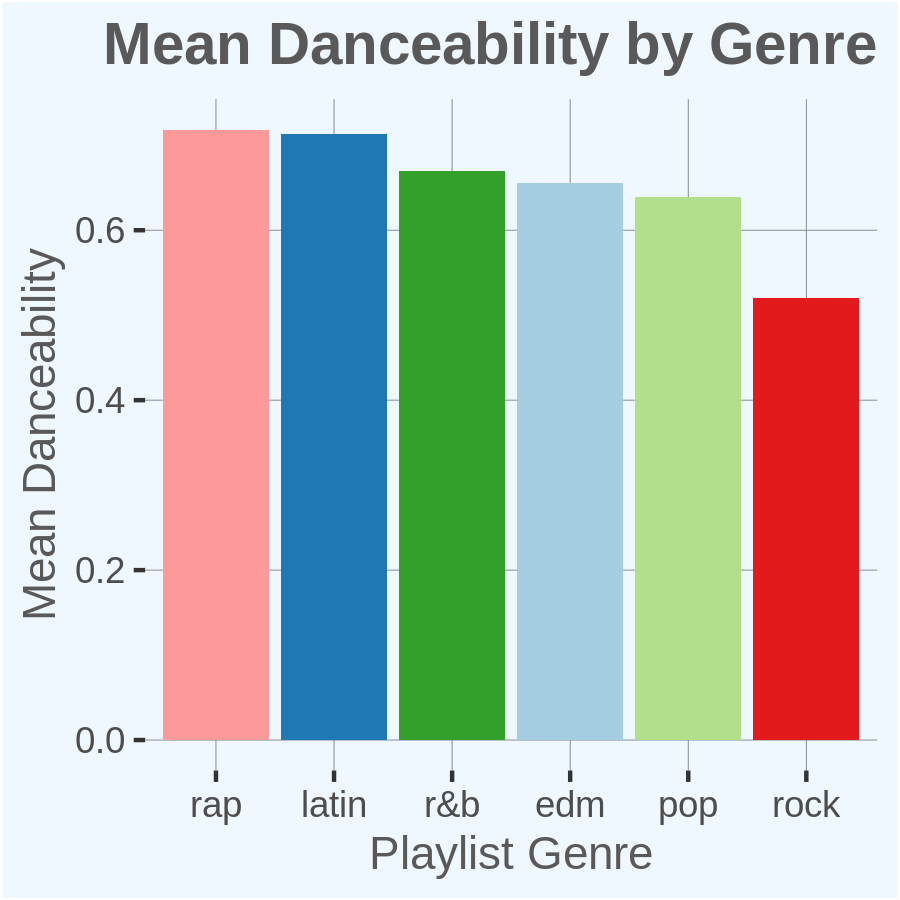

In [4]:
mean_dance <- songs %>% group_by(playlist_genre) %>% summarize(mean_d = mean(danceability))
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
p1 = ggplot(mean_dance, aes(x = reorder(playlist_genre, desc(mean_d)), y = mean_d, fill = playlist_genre))
p1 = p1 + geom_col() + scale_fill_brewer(type = qual, palette = 'Paired')
p1 = p1 + labs(x = 'Playlist Genre', y = 'Mean Danceability') + theme(legend.position = 'none')
p1 = p1 + labs(title = "Mean Danceability by Genre") + theme(plot.title = element_text(color='gray35', size=14, face="bold"),
                                                            axis.title = element_text(color='gray35'))
p1 = p1 + theme(plot.background = element_rect(fill = "aliceblue"),
                panel.background = element_rect(fill = "aliceblue"))
p1 = p1 + theme(panel.border = element_blank(),
                panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "slategray"), 
                panel.grid.minor = element_blank(),
                axis.line = element_blank(), 
                plot.title = element_text(hjust=1))
p1

# Rap, Latin and R&B have better danceability than EDM.
## So what does EDM's Danceability rating look like?

In [25]:
edm.bin <- songs %>% mutate(edm.binary = (playlist_genre == 'edm'))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



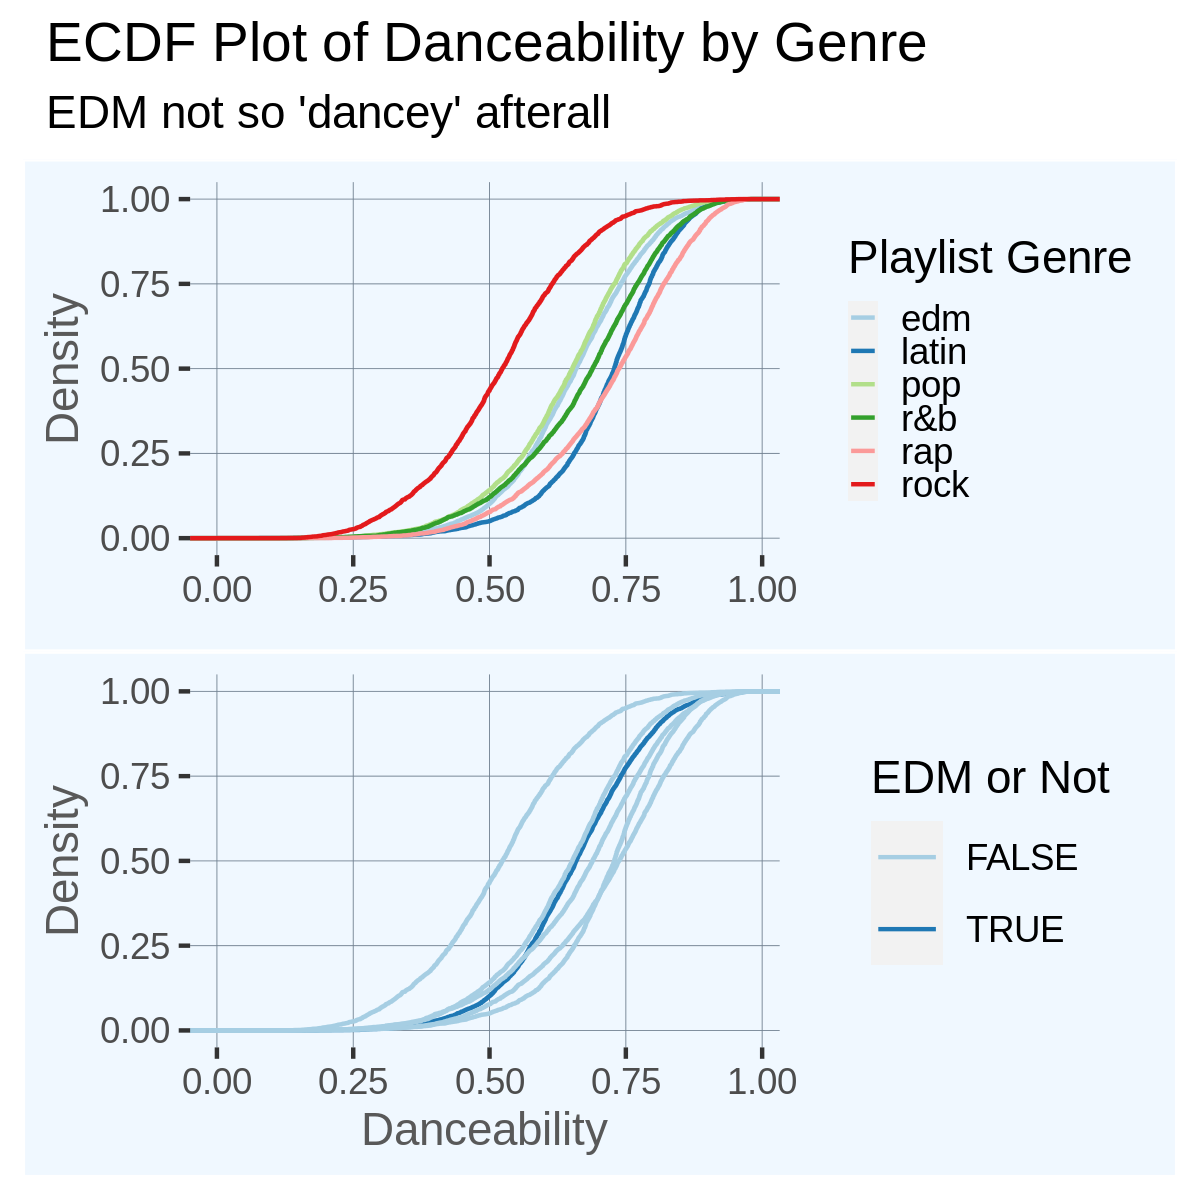

In [47]:
options(repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)
p2 = ggplot(songs, aes(x = danceability, color = playlist_genre))
p2 = p2 + stat_ecdf() + scale_color_brewer(name = "Playlist Genre", palette = "Paired")
p2 = p2 + labs(x = element_blank(), y = 'Density')
p2 = p2 + theme(plot.title = element_text(color='gray35', size=14, face="bold"),
                                                        axis.title = element_text(color='gray35'))
p2 = p2 + theme(plot.background = element_rect(fill = "aliceblue"),
                panel.background = element_rect(fill = "aliceblue"),
                legend.background = element_rect(fill = 'aliceblue'),
                legend.position = "right",
                legend.key.size = unit(0.25, 'cm'))
p2 = p2 + theme(panel.border = element_blank(),
                panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "slategray"), 
                panel.grid.minor = element_blank(),
                axis.line = element_blank())

p3 = ggplot(edm.bin, aes(group = playlist_genre, x = danceability, color = edm.binary))
p3 = p3 + stat_ecdf() + scale_color_brewer(palette = "Paired")
p3 = p3 + scale_color_brewer(name = "EDM or Not", palette = "Paired")
p3 = p3 + labs(x = 'Danceability', y = 'Density')
p3 = p3 + theme(plot.title = element_text(color='gray35', size=14, face="bold"),
                axis.title = element_text(color='gray35'))
p3 = p3 + theme(plot.background = element_rect(fill = "aliceblue"),
                panel.background = element_rect(fill = "aliceblue"),
                legend.background = element_rect(fill = 'aliceblue'))
p3 = p3 + theme(panel.border = element_blank(),
                panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "slategray"), 
                panel.grid.minor = element_blank(),
                axis.line = element_blank())

p2 / p3 + plot_annotation(title = "ECDF Plot of Danceability by Genre",
                          subtitle = "EDM not so 'dancey' afterall")

In [6]:
edm <- songs %>% filter(playlist_genre == 'edm')
mean(edm$danceability)
sd(edm$danceability)

[1] 0.6550409

[1] 0.1235584

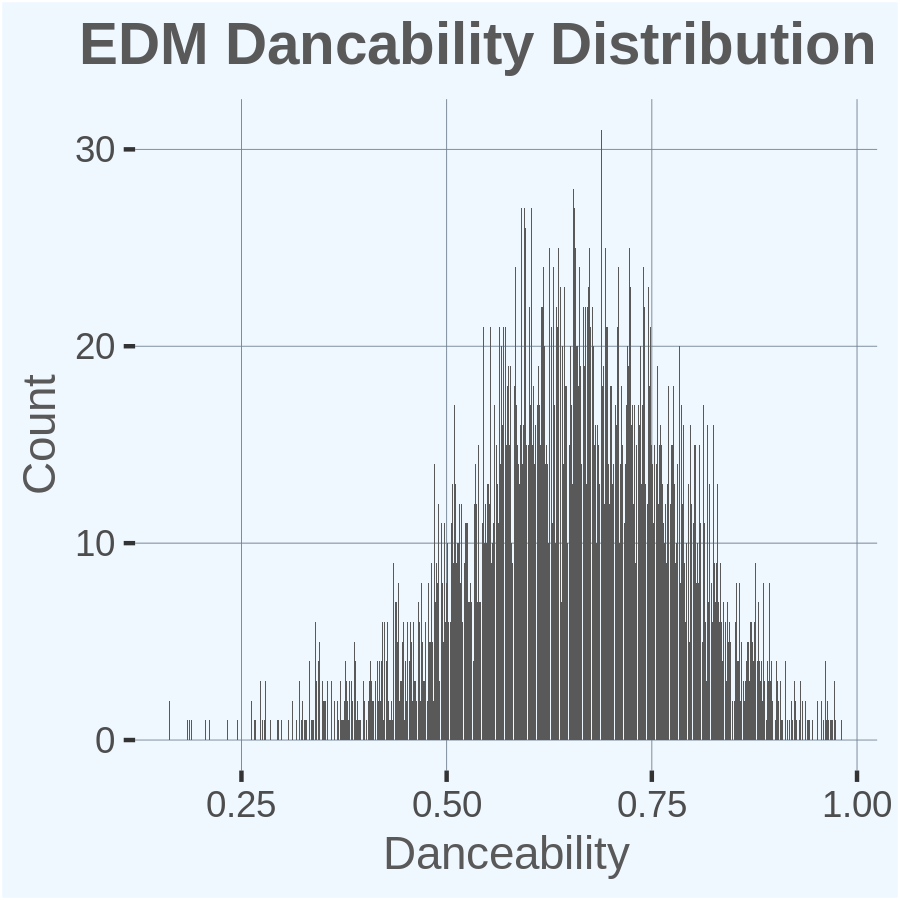

In [7]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
p4 = ggplot(edm, aes(x = danceability))
p4 = p4 + geom_bar()
p4 = p4 + scale_color_brewer(palette = "Paired")
p4 = p4 + labs(x = 'Danceability', y = 'Count') + theme(legend.position = 'none')
p4 = p4 + labs(title = "EDM Dancability Distribution") + theme(plot.title = element_text(color="gray35", size=14, face="bold"),
                                                               axis.title = element_text(color='gray35'))
p4 = p4 + theme(plot.background = element_rect(fill = "aliceblue"),
                panel.background = element_rect(fill = "aliceblue"))
p4 = p4 + theme(panel.border = element_blank(),
                panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "slategray"), 
                panel.grid.minor = element_blank(),
                axis.line = element_blank(), 
                plot.title = element_text(hjust=1))
p4

### EDM danceability
- Mean of 0.655
- Standard Deviation of 0.123

<i> An average danceability in the 65th percentile doesn't seem to warrant "dance" in the genre title... </i>

So where does EDM rank in the other measures?

In [12]:
tile <- songs %>% group_by(playlist_genre) %>% 
        summarize(Mean_Danceability = mean(danceability), Mean_Energy = mean(energy), Mean_Loudness = mean(loudness)) %>%
        pivot_longer(cols = c(Mean_Danceability, Mean_Energy, Mean_Loudness)) %>% 
        group_by(name) %>%
        mutate(value.scaled = scales::rescale(value))
tile %>% print

`summarise()` ungrouping output (override with `.groups` argument)



# A tibble: 18 x 4
# Groups:   name [3]
   playlist_genre name               value value.scaled
   <chr>          <chr>              <dbl>        <dbl>
 1 edm            Mean_Danceability  0.655        0.680
 2 edm            Mean_Energy        0.802        1    
 3 edm            Mean_Loudness     -5.43         1    
 4 latin          Mean_Danceability  0.713        0.974
 5 latin          Mean_Energy        0.708        0.555
 6 latin          Mean_Loudness     -6.26         0.657
 7 pop            Mean_Danceability  0.639        0.600
 8 pop            Mean_Energy        0.701        0.520
 9 pop            Mean_Loudness     -6.32         0.636
10 r&b            Mean_Danceability  0.670        0.756
11 r&b            Mean_Energy        0.591        0    
12 r&b            Mean_Loudness     -7.86         0    
13 rap            Mean_Danceability  0.718        1    
14 rap            Mean_Energy        0.651        0.283
15 rap            Mean_Loudness     -7.04         0.337
16 rock 

rbind is a merge function (stacks rows)

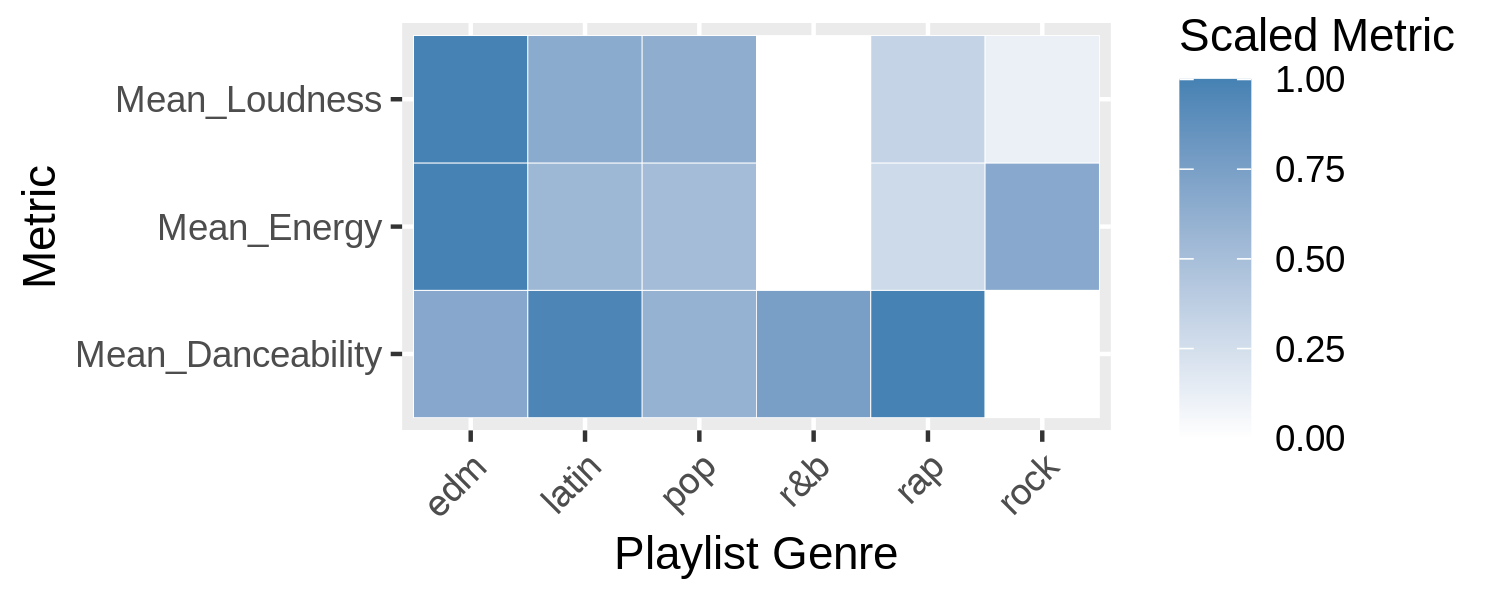

In [48]:
options(repr.plot.width = 5, repr.plot.height = 2, repr.plot.res = 300)
p5 = ggplot(tile, aes(x = playlist_genre, y = name, fill = value.scaled))
p5 = p5 + geom_tile(color = 'white') 
p5 = p5 + scale_fill_gradient(name = "Scaled Metric", low = "white", high = "steelblue") + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p5 = p5 + labs(x = 'Playlist Genre', y = 'Metric')
p5

### EDM emerges as the clear ruler of energy and loudness
#### Perhaps another name for this genre would be more apt:
 - LEM (Loud Electronic Music)
 - EEM (Energetic Electronic Music)
 - LEEBNFDM (Loud, Energertic, Electronic But Not For Dancing Music)